# REGRESSION


# Data Preparation Tasks

# Import necessary libraries:
Import pandas, numpy, and scikit-learn libraries.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load a dataset:
Load a dataset (e.g., Boston Housing dataset) into a pandas DataFrame.


In [4]:
df=pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


# Inspect the dataset:
Display the first few rows and summary statistics of the dataset.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
df.columns #n. of  columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [60]:
df.count() # number of rows

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [9]:
df.shape

(506, 14)

# Check for missing values:
Check and handle any missing values in the dataset.


In [40]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [41]:
print("Infinite values in each feature:\n", np.isinf(x).sum())

Infinite values in each feature:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64


In [42]:
df.fillna(df.mean(), inplace=True)  #handiling missing values

In [57]:
print(f'Any NaN values? {df.isna().values.any()}')

Any NaN values? False


In [58]:
print(f'Any duplicates? {df.duplicated().values.any()}')

Any duplicates? False


# Feature selection:
Select relevant features for the regression model.


In [43]:
from sklearn.feature_selection import RFE, RFECV


In [44]:
from sklearn.linear_model import LinearRegression


In [49]:
from sklearn.preprocessing import StandardScaler

In [63]:
# Define the features and target variable
X = df.drop('MEDV', axis=1)  # Features
y = df['MEDV']  # Target


In [72]:
# Normalize the data
scaler = StandardScaler()
scaled_x = scaler.fit_transform(X)

In [73]:
model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe = rfe.fit(X, y)


In [74]:
# Get the ranking of the features
print('Ranking of features:', rfe.ranking_)

Ranking of features: [5 6 3 1 1 1 8 1 4 7 1 9 2]


# Split the data:
Split the data into training and testing sets.


In [68]:
from sklearn.model_selection import train_test_split


In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the shape of the training and testing sets
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (354, 13)
x_test shape: (152, 13)
y_train shape: (354,)
y_test shape: (152,)


# Model Training and Evaluation Tasks

# Train a Linear Regression model:
Train a simple linear regression model on the training data.


In [76]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# Make predictions:
Make predictions on the testing data.


In [77]:
y_pred = lr.predict(x_test)

In [78]:
y_pred

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

# Evaluate the model:
Calculate the Mean Absolute Error (MAE) of the model.


In [79]:
from sklearn.metrics import mean_absolute_error, r2_score

In [85]:
mae = mean_absolute_error(y_test, y_pred)


In [86]:
mae

3.1410525671083374

# Calculate R-squared:
Calculate the R-squared value to assess model performance.


In [83]:
from sklearn.metrics import mean_absolute_error, r2_score

In [84]:
r2 = r2_score(y_test, y_pred)
r2

0.7071862632031873

# Plot actual vs predicted values:
Create a scatter plot of actual vs predicted values.


# 'k--': This is a string that specifies the style of the line:
'k' indicates the color of the line (black in this case). '--' indicates that the line should be dashed.

# [y_test.min(), y_test.max()]: This specifies the x-coordinates of the points that define the line.
y_test.min() gets the minimum value from the actual target values (the ground truth).
y_test.max() gets the maximum value from the actual target values.
This means the line will start from the minimum actual value and extend to the maximum actual value

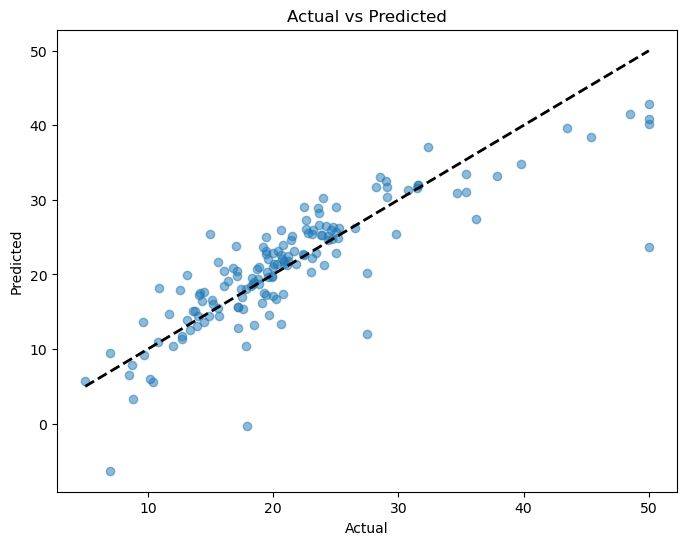

In [87]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()                             # lw=2 for thickness

# Advanced Regression Techniques Tasks

# Polynomial Regression:
Train a polynomial regression model.


# Evaluate Polynomial Regression:
Calculate the MAE and R-squared for the polynomial regression model.


In [89]:
from sklearn.preprocessing import PolynomialFeatures

# PolynomialFeatures(degree=2) creates new features by taking the original features and raising them to powers up to the specified degree (2 in this case)

In [94]:
poly= PolynomialFeatures(degree= 2)
x_train_poly= poly.fit_transform(x_train)
x_test_poly= poly.transform(x_test)

In [130]:
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [131]:
y_pred_ploy = poly_model.predict(x_test_poly)

# Evaluate Polynomial Regression

In [135]:
poly_mae = mean_absolute_error(y_test, y_pred_ploy)
poly_r2 = r2_score(y_test, y_pred_ploy)
print(poly_r2)

0.5374014284812872


In [136]:
print(poly_mae)

3.2312574297458343


# Ridge Regression:
Train a ridge regression model.


# Evaluate Ridge Regression:
Calculate the MAE and R-squared for the ridge regression model.



In [99]:
from sklearn.linear_model import Ridge

# Ridge Regression (Ridge(alpha=1.0)): Adds L2 regularization, which penalizes large coefficients but does not shrink them to zero, making it useful when all features are expected to contribute to the prediction

In [101]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)


Ridge()

In [102]:
ridge_y_pred = ridge_model.predict(x_test)

In [103]:
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

In [104]:
print(ridge_r2)

0.7005989750756149


In [112]:
print(ridge_mae)

3.158193755884402


# Lasso Regression:
Train a lasso regression model.


# Evaluate lasso Regression:
Calculate the MAE and R-squared for the lasso regression model.


In [105]:
from sklearn.linear_model import Lasso

# Lasso Regression (Lasso(alpha=0.1)): Adds L1 regularization to the model, which can shrink some coefficients to zero, making it useful for feature selection.

In [106]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)


Lasso(alpha=0.1)

In [107]:
lasso_y_pred = lasso_model.predict(x_test)

In [109]:
lasso_mae = mean_absolute_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)


In [110]:
print(lasso_mae)

3.224332395349057


In [111]:
print(lasso_r2)

0.6914578902133115


# ElasticNet Regression:
Train an ElasticNet regression model.


# Evaluate ElasticNet Regression:
Calculate the MAE and R-squared for the ElasticNet  regression model.


In [115]:
from sklearn.linear_model import ElasticNet

In [116]:
elastic_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_model.fit(x_train, y_train)
elastic_y_pred = elastic_model.predict(x_test)
elastic_mae = mean_absolute_error(y_test, elastic_y_pred)
elastic_r2 = r2_score(y_test, elastic_y_pred)
print(f'ElasticNet Regression: MAE = {elastic_mae:.2f}, R-squared = {elastic_r2:.2f}')

ElasticNet Regression: MAE = 3.44, R-squared = 0.68


# Compare all models:
Compare the performance of all regression models and visualize the results.


In [139]:
results = {
    'Model': ['Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression'],
    'MAE': [poly_mae, ridge_mae, lasso_mae, elastic_mae],
    'R-squared': [poly_r2, ridge_r2, lasso_r2, elastic_r2]
}

results_df = pd.DataFrame(results)

In [140]:
print(results_df)

                   Model       MAE  R-squared
0  Polynomial Regression  3.231257   0.537401
1       Ridge Regression  3.158194   0.700599
2       Lasso Regression  3.224332   0.691458
3  ElasticNet Regression  3.440487   0.683913


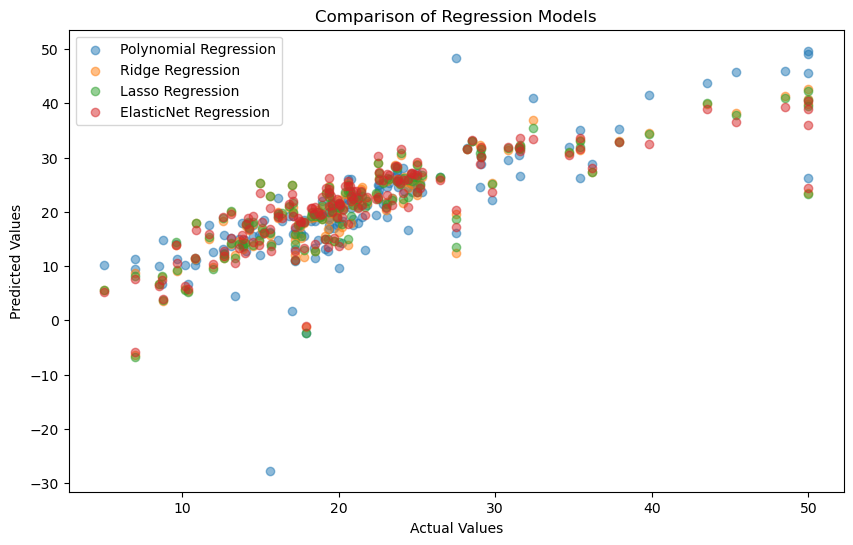

In [141]:
# Visualize the results
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(y_test, y_pred_ploy, label='Polynomial Regression', alpha=0.5)
ax.scatter(y_test, ridge_y_pred, label='Ridge Regression', alpha=0.5)
ax.scatter(y_test, lasso_y_pred, label='Lasso Regression', alpha=0.5)
ax.scatter(y_test, elastic_y_pred, label='ElasticNet Regression', alpha=0.5)

# Add labels and title
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('Comparison of Regression Models')
ax.legend()

# Display the plot
plt.show()

# Advanced Regression Techniques

# Train a Decision Tree Regressor:



# Train a decision tree regressor on the training data.


In [142]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [143]:
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor()

# Evaluate the performance using MSE and R-squared.

In [144]:
y_pred_dt = dt_regressor.predict(x_test)

In [145]:
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)



In [146]:
print(dt_mse)
print(dt_r2)

24.429868421052632
0.6721399341300787


# Train a Random Forest Regressor:
Train a random forest regressor on the training data.


In [147]:
from sklearn.ensemble import RandomForestRegressor


In [148]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

RandomForestRegressor()

In [149]:
y_pred_rf = rf_regressor.predict(x_test)

# Evaluate the performance using MSE and R-squared.


In [150]:
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

In [151]:
print(rf_mse)
print(rf_r2)

9.684998394736843
0.8700228688537617


# Train a Gradient Boosting Regressor:
Train a gradient boosting regressor on the training data.


In [155]:
from sklearn.ensemble import GradientBoostingRegressor

In [157]:
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)


GradientBoostingRegressor()

In [158]:
y_pred_gb = gb_regressor.predict(x_test)

# Evaluate the performance using MSE and R-squared


In [159]:
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

In [160]:
print(gb_mse)
print(gb_r2)

8.42175152481148
0.8869762226273248


In [163]:
results = {
    'Model': ['dt_regressor', 'rf_regresso', 'gb_regressor'],
    'MAE': [dt_mse, rf_mse, gb_mse],
    'R-squared': [dt_r2, rf_r2, gb_r2]
}

results_df7 = pd.DataFrame(results)

In [164]:
print(results_df7)

          Model        MAE  R-squared
0  dt_regressor  24.429868   0.672140
1   rf_regresso   9.684998   0.870023
2  gb_regressor   8.421752   0.886976


# Model Tuning and Optimization:::

# Hyperparameter Tuning for Ridge Regression:
Perform hyperparameter tuning for the alpha parameter of the ridge regression model using cross-validation.


In [165]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge_regressor = Ridge()
grid_search = GridSearchCV(ridge_regressor, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(f'Best Alpha: {grid_search.best_params_["alpha"]}')
print(f'Best Score: {grid_search.best_score_}')

Best Alpha: 0.1
Best Score: 0.6766815039525739


# Hyperparameter Tuning for Lasso Regression:
Perform hyperparameter tuning for the alpha parameter of the lasso regression 


In [166]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [170]:
param_grid= {'alpha': [0.1, 1, 10,100] }
lasso_regressor= Lasso()
grid_search= GridSearchCV(lasso_regressor,param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(f'BEST ALPHA: {grid_search.best_params_["alpha"]}')
print(f'BEST SCORE: {grid_search.best_score_}')

BEST ALPHA: 0.1
BEST SCORE: 0.6684514748259278


# Hyperparameter Tuning for Random Forest:



# Perform hyperparameter tuning for the number of estimators and max depth of the random forest regressor using cross-validation


In [171]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Assume X_train, y_train are your training data
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15]
}
rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5)
grid_search.fit(x_train, y_train)

print(f'Best n_estimators: {grid_search.best_params_["n_estimators"]}')
print(f'Best max_depth: {grid_search.best_params_["max_depth"]}')
print(f'Best Score: {grid_search.best_score_}')

Best n_estimators: 100
Best max_depth: 15
Best Score: 0.7941907158853029


# Hyperparameter Tuning for Gradient Boosting:


# Perform hyperparameter tuning for the learning rate and number of estimators of the gradient boosting regressor using cross-validation.

In [175]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}
gb_regressor = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_regressor, param_grid, cv=5)
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'n_estimators': [100, 200, 300]})

In [176]:

print(f'Best learning_rate: {grid_search.best_params_["learning_rate"]}')
print(f'Best n_estimators: {grid_search.best_params_["n_estimators"]}')
print(f'Best Score: {grid_search.best_score_}')

Best learning_rate: 0.1
Best n_estimators: 100
Best Score: 0.8265513459241814
